# 시각화

## 선 그래프

### Pandas: `plot()`

In [ ]:
import pandas as pd

df = pd.read_excel('C:\\Users\\Administrator\\GitHub\\TIL\\Python\\source_판다스 데이터 분석\\part3\\남북한발전전력량.xlsx', engine='openpyxl')  # 데이터프레임 변환 

df_ns = df.iloc[[0, 5], 3:]            # 남한, 북한 발전량 합계 데이터만 추출
df_ns.index = ['South','North']        # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int) # 열 이름의 자료형을 정수형으로 변경

df_ns.head()

In [ ]:
# 연도별 변화를 확인하기 위해 연도를 x 축으로 표현하는 것이 좋음.
# 행, 열 전치 수행

tdf_ns = df_ns.T
tdf_ns.head()

In [ ]:
# 선 그래프 그리기

tdf_ns.plot()

### matplotlib: `plot()`

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel( 'C:\\Users\\Administrator\\GitHub\\TIL\\Python\\source_판다스 데이터 분석\\part4\\시도별 전출입 인구수.xlsx',
                    engine='openpyxl',
                    header=0 )

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 

df[mask]

In [ ]:
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

#### x, y축 데이터를 `plot()` 함수에 입력

In [ ]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

#### 판다스 객체를 `plot()` 함수에 입력

In [ ]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

In [ ]:
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [ ]:
plt.plot(sr_one)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel( 'C:\\Users\\Administrator\\GitHub\\TIL\\Python\\source_판다스 데이터 분석\\part4\\시도별 전출입 인구수.xlsx',
                    engine='openpyxl',
                    header=0 )

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

## 산점도

### Seaborn

#### 회귀선이 있는 산점도: `regplot()`

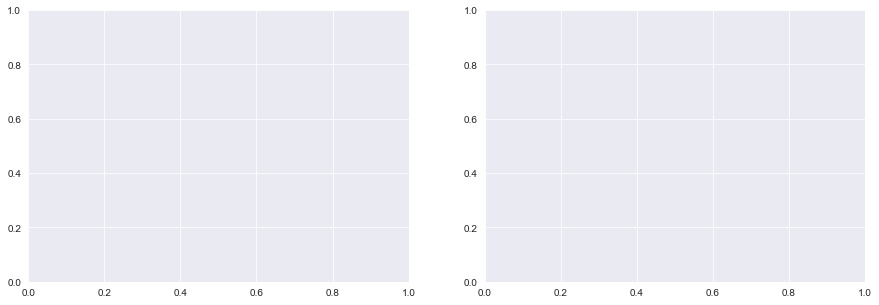

In [12]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
 
# Seaborn 제공 데이터셋 가져오기
titanic = sb.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sb.set_style('darkgrid')



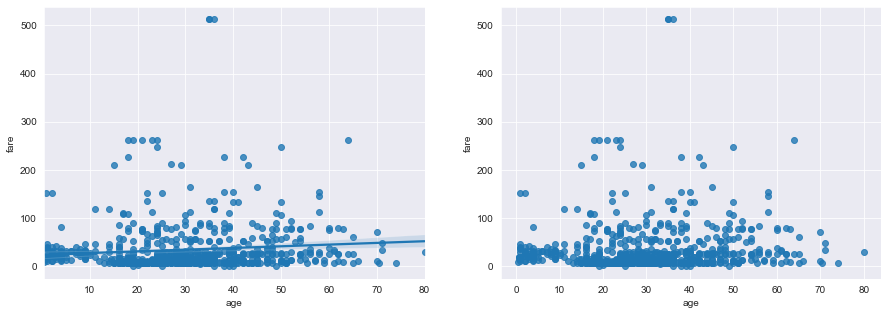

In [14]:
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure( figsize=(15, 5) )   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sb.regplot( x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax1)         #axe 객체 - 1번째 그래프

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sb.regplot( x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax2,         #axe 객체 - 2번째 그래프        
            fit_reg=False)  #회귀선 미표시

plt.show()

#### 범주형 데이터의 산점도: `displot()`, `kdeplot()`, `hisplot()`

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

facet =  sns.FacetGrid(titanic, col = 'sex')
facet = facet.map(plt.hist)


In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   

 
# distplot
dist = sns.distplot(titanic['fare'])

# displot
dis = sns.displot(titanic['fare'], kde = True) 

# kdeplot
kde = sns.kdeplot(x='fare', data=titanic) 

# histplot
hist = sns.histplot(x='fare', data=titanic, kde = True)        

# 차트 제목 표시
dis.set_title('titanic fare - distplot')
kde.set_title('titanic fare - kedplot')
hist.set_title('titanic fare - histplot')

plt.show()

In [ ]:
sns.distplot(titanic['fare'], kde = True) 

## 히스토그램

### `.plot(kind='hist')`

In [16]:
df_iris = pd.read_csv( 'C:\\Users\\Administrator\\GitHub\\TIL\\ADP_study\\rawdata\\iris.csv',
                         index_col = 'Unnamed: 0' )

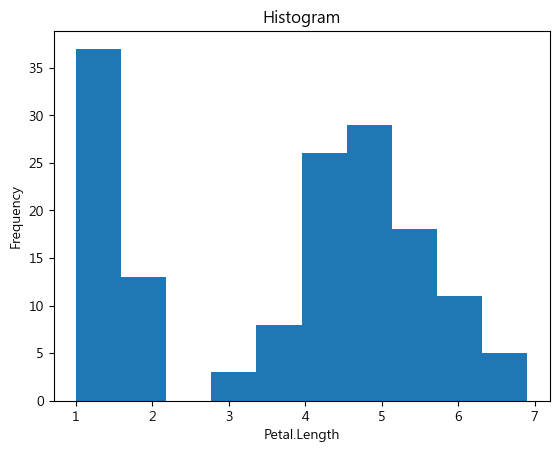

In [25]:
df_iris['Petal.Length'].plot( kind = 'hist' )

plt.title('Histogram')
plt.xlabel('Petal.Length')
plt.show()

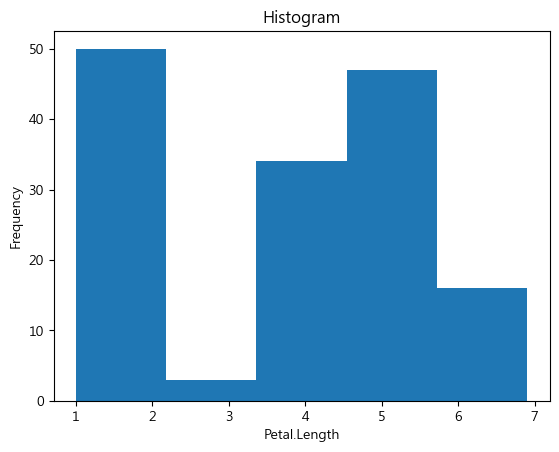

In [26]:
df_iris['Petal.Length'].plot( kind = 'hist',
                              bins = 5 )  # 구간의 개수 지정

plt.title('Histogram')
plt.xlabel('Petal.Length')
plt.show()

TypeError: _set_ticklabels() missing 1 required positional argument: 'labels'

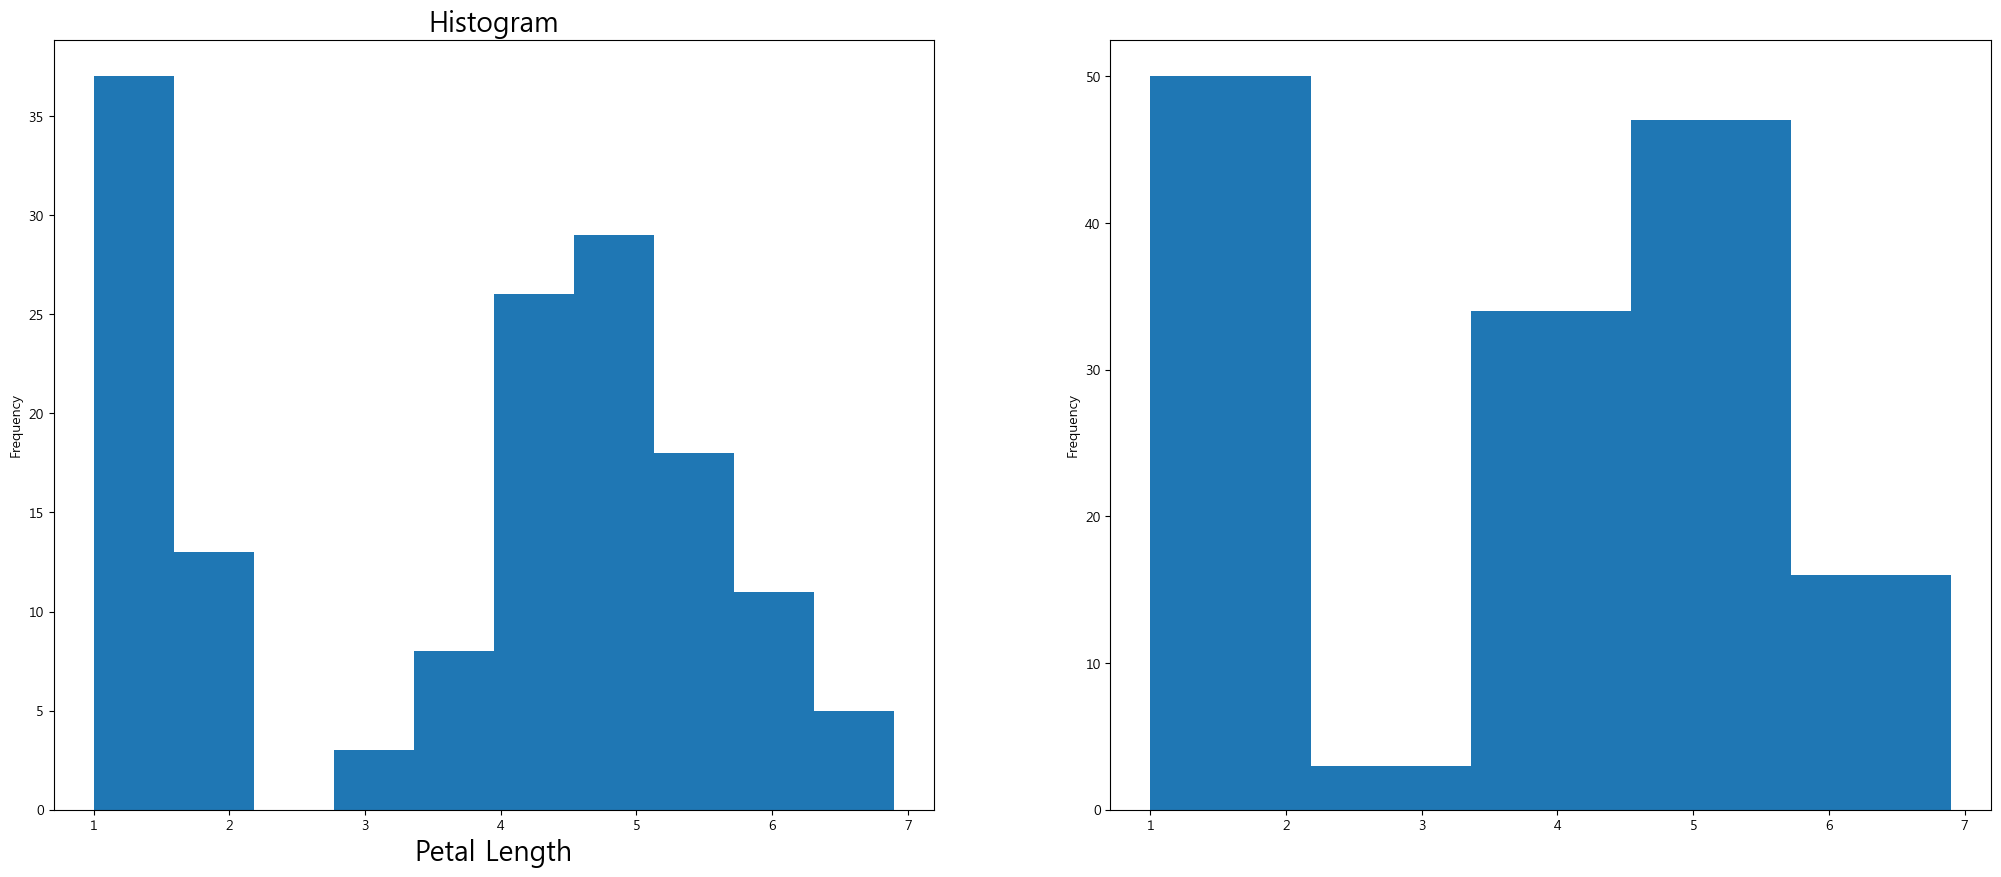

In [24]:
fig = plt.figure( figsize = (25, 10) )
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

df_iris['Petal.Length'].plot( kind = 'hist',
                              ax = ax1 )

df_iris['Petal.Length'].plot( kind = 'hist',
                              bins = 5,
                              ax = ax2 )  # 구간의 개수 지정

ax1.set_title( 'Histogram', size = 20 )
ax1.set_xlabel( 'Petal Length', size=20 )
ax1.set_yticklabels( fontsize=15 )



plt.show()

### `seaborn.histplot()`

## 막대 그래프

### Pandas: `plot( kind = 'bar' )`

In [ ]:
import pandas as pd

df = pd.read_excel('C:\\Users\\Administrator\\GitHub\\TIL\\Python\\source_판다스 데이터 분석\\part3\\남북한발전전력량.xlsx', engine='openpyxl')  # 데이터프레임 변환 

df_ns = df.iloc[[0, 5], 3:]            # 남한, 북한 발전량 합계 데이터만 추출
df_ns.index = ['South','North']        # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int) # 열 이름의 자료형을 정수형으로 변경

# 연도별 변화를 확인하기 위해 연도를 x 축으로 표현하는 것이 좋음.
# 행, 열 전치 수행
tdf_ns = df_ns.T

display( tdf_ns.head() )

In [ ]:
# 막대 그래프 그리기

tdf_ns.plot(kind='bar')

## 박스플롯

## 면적 그래프

## 파이차트

## 히트맵

## 이변수 데이터의 분포 표현